In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DiD_data.csv')
df = pd.DataFrame(data)

In [3]:
# rename columns
df.columns = ['Bank', 'Date', 'TAR', 'Affected_BHC', 'After_DFA', 'Profitability', 'Leverage_ratio', 'Total_assets', 'Non_performing_loan_ratio', 'Cost_income_ratio', 'Deposit_ratio', 'Real_estate_loan_ratio', 'Liquidity_ratio', 'CPP_recipient']

In [4]:
# establish top 10 Affected BHCs by trading assets

# create a column that shows total trading assets of banks
df_top10 = df.copy()
df_top10['trading_assets'] = df_top10['TAR'] * np.exp(df_top10['Total_assets'])
df_top10

,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,trading_assets
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0.0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0.0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0.0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0.0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81555,3832583,20110331,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0.669560,NaN,NaN,0,NaN
81556,3832583,20110630,NaN,0,1,NaN,NaN,13.061935,0.013621,NaN,0.637159,0.001838,NaN,0,NaN
81557,3832583,20150331,0.0,0,1,0.005248,0.225874,13.562950,0.008613,0.498866,0.709762,0.001823,NaN,0,0.0
81558,3832583,20150630,0.0,0,1,0.005353,0.226806,13.558450,0.007032,0.533240,0.714977,0.001938,NaN,0,0.0


In [5]:
# We use the mean trading assets before 2007 to define the top 10
top10 = df_top10[(df_top10['Affected_BHC'] == 1) & (df_top10['Date'] < 20080000)].groupby('Bank')['trading_assets'].mean()

In [6]:
# top 10 banks by trading assets by bank number
top10 = top10.sort_values(ascending=False).head(10)
df_top10 = df_top10[df_top10['Bank'].isin(top10.index)]
df_top10

,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,trading_assets
1361,1039502,20040930,0.235039,1,0,0.001450,0.077595,20.852951,0.019520,0.559893,0.256591,0.354119,0.064694,0,2.675844e+08
1362,1039502,20041231,0.251247,1,0,0.001451,0.092131,20.869310,0.018247,0.539865,0.227403,0.360078,0.052704,0,2.907549e+08
1363,1039502,20050331,0.254006,1,0,0.001939,0.090340,20.887342,0.017743,0.498619,0.228123,0.361415,0.046781,0,2.992961e+08
1364,1039502,20050630,0.251873,1,0,0.000846,0.089686,20.881365,0.017612,0.581872,0.231952,0.377931,0.041456,0,2.950145e+08
1365,1039502,20050930,0.249962,1,0,0.002129,0.089087,20.908112,0.018822,0.447572,0.226194,0.380548,0.039657,0,3.007122e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81133,3375370,20140630,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
81134,3375370,20140930,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
81135,3375370,20141231,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
81136,3375370,20150331,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
# mean of the TAR of the top 10 group
top10plot = df_top10.groupby('Date')['TAR'].mean()

In [8]:
df_nottop10 = df[~df['Bank'].isin(top10.index)]
df_nottop10 = df_nottop10[(df_nottop10['Affected_BHC']==1)]

abhc_plot = df_nottop10.groupby('Date')['TAR'].mean()

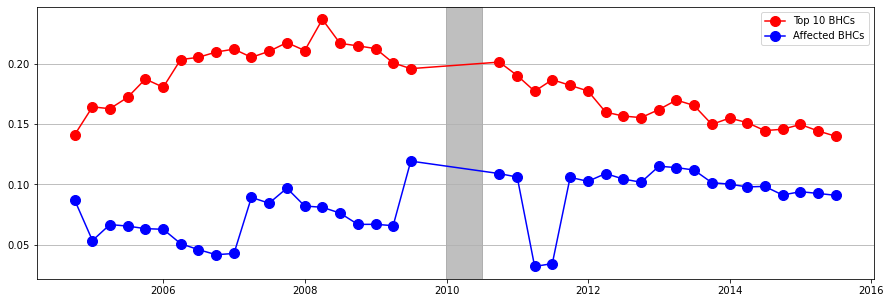

In [9]:
# plot graph
# DFA announced 20090930 to 20100630

x_top10 = pd.to_datetime(top10plot.index, format='%Y%m%d', errors='ignore')
x_nottop10 = pd.to_datetime(abhc_plot.index, format='%Y%m%d', errors='ignore')

plt.figure(figsize=(15,5))
plt.grid(axis = 'y')
plt.axvspan(pd.to_datetime('20091231', format='%Y%m%d'), pd.to_datetime('20100630', format='%Y%m%d'), color='grey', alpha=0.5)
plt.plot(x_top10,top10plot.values,'o-', color='red', markersize=10, label='Top 10 BHCs')
plt.plot(x_nottop10,abhc_plot.values,'o-', color='blue', markersize=10, label='Affected BHCs')
plt.legend(loc="upper right")

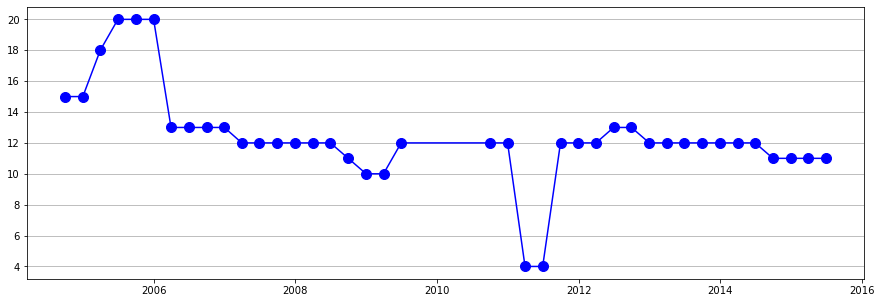

In [10]:
# we see that the anomaly in the two datapoints after DFA is due to insufficent data for those points
df_nottop10_count = df_nottop10.groupby('Date')['TAR'].count()

x_count = pd.to_datetime(df_nottop10_count.index, format='%Y%m%d', errors='ignore')
plt.figure(figsize=(15,5))
plt.grid(axis = 'y')
plt.plot(x_count,df_nottop10_count.values,'o-', color='blue', markersize=10)

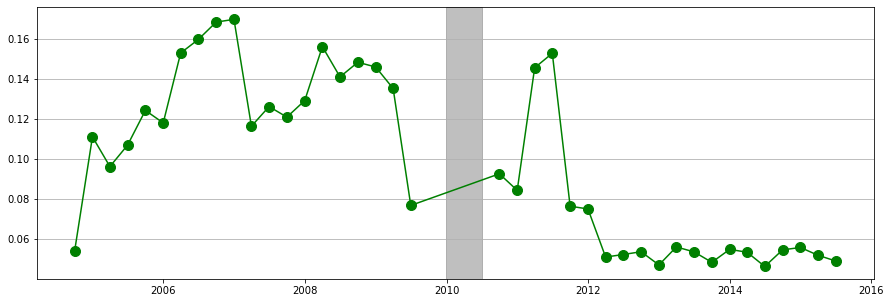

In [11]:
# Plotting the difference in TAr between the top 10 banks and the rest of the affected BHCs
diff = top10plot - abhc_plot

x_diff = pd.to_datetime(diff.index, format='%Y%m%d', errors='ignore')
plt.figure(figsize=(15,5))
plt.grid(axis = 'y')
plt.axvspan(pd.to_datetime('20091231', format='%Y%m%d'), pd.to_datetime('20100630', format='%Y%m%d'), color='grey', alpha=0.5)
plt.plot(x_diff,diff.values,'o-', color='green', markersize=10)